In [20]:
import pandas as pd
import numpy as np


In [99]:
honoraires=pd.read_csv('Depassement par departements.csv')
population=pd.read_csv('pop_par_dep_par_an_regroupe.csv',sep=';')
surf_dep=pd.read_csv('surface_departements.csv',sep=',')

In [100]:
#Cleaning Population

population['value'] = population.value.astype(int)
population['annee'] = population.annee.astype(int)
pop_bis=population[population.annee==2014]
pop_bis.head()

population=population.groupby(['dep'])['value'].sum().reset_index()


#Cleaning surf_dep

surf_dep= surf_dep.rename(columns={
    'code_insee': 'dep',
    })

surf_dep=surf_dep.groupby(['dep'])['surf_km2'].sum().reset_index()

# Merge Population and surf_dep and create a new column 'densite'

Pop_surf=population.merge(surf_dep, left_on=['dep'], right_on=['dep'])
Pop_surf['densite']=Pop_surf['value']/Pop_surf['surf_km2']
Pop_surf['dep']=Pop_surf.dep.str.upper()

#Cleaning honoraires

honoraires=pd.read_csv('Depassement par departements.csv')
honoraires=honoraires[['Spécialistes','DEPARTEMENT','DEPASSEMENTS (Euros)']]
honoraires=honoraires.rename(columns={
    'DEPARTEMENT': 'dep','DEPASSEMENTS (Euros)':'Depassement'
    })
honoraires['Depassement'] = population.value.astype(int)
honoraires.dropna()
honoraires['dep'] = honoraires.dep.str[:2]
honoraires['dep']=honoraires.dep.str.replace(' ', '')
honoraires['dep']=honoraires.dep.str.upper()

density_honoraires=honoraires.merge(Pop_surf,left_on=['dep'],right_on=['dep'],how='left')
density_honoraires.dropna()



,Spécialistes,dep,Depassement,value,surf_km2,densite
9,02- Anesthésie-réanimation chirurgicale,10,1869855.0,1828872.0,6027.0,303.446491
10,02- Anesthésie-réanimation chirurgicale,11,1450645.0,2164607.0,6343.0,341.259183
11,02- Anesthésie-réanimation chirurgicale,12,3243733.0,1656668.0,8773.0,188.837114
12,02- Anesthésie-réanimation chirurgicale,13,3159054.0,11886613.0,5247.0,2265.411283
13,02- Anesthésie-réanimation chirurgicale,14,3566286.0,4117404.0,5592.0,736.302575
14,02- Anesthésie-réanimation chirurgicale,15,731709.0,884922.0,5774.0,153.259785
15,02- Anesthésie-réanimation chirurgicale,16,2493851.0,2118539.0,5973.0,354.685920
16,02- Anesthésie-réanimation chirurgicale,17,3180047.0,3760731.0,6906.0,544.559948
17,02- Anesthésie-réanimation chirurgicale,18,2937568.0,1869855.0,7307.0,255.899138
18,02- Anesthésie-réanimation chirurgicale,19,3539932.0,1450645.0,5898.0,245.955409


<BarContainer object of 5720 artists>

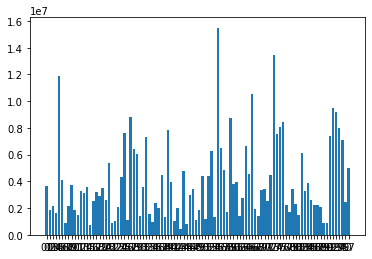

In [87]:
import matplotlib.pyplot as plt

plt.bar(density_honoraires['dep'],density_honoraires['Depassement'])

Text(0, 0.5, 'Sequential')

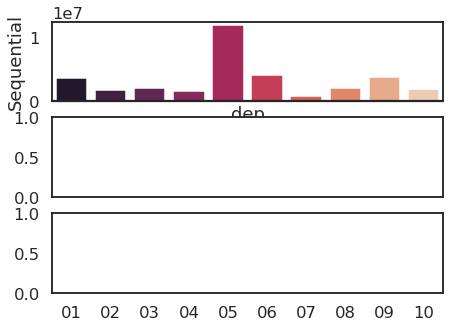

In [95]:
import seaborn as sns

sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = density_honoraires['dep'][0:10]
y1 = density_honoraires['Depassement'][0:10]
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")
